In [1]:
# 单张图片inference
!CUDA_VISIBLE_DEVICES=1 python detect.py --model_path ./result/bs8_1x/model_11.pth --image_path imgs/6.jpg

Creating model
/home/gbc/.conda/envs/rookie/lib/python3.7/site-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629403081/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


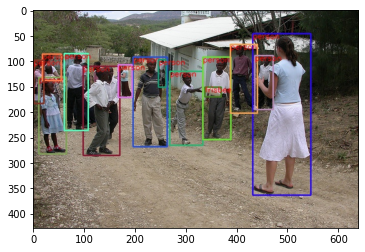

In [2]:
# 可视化单张图片
import matplotlib.pyplot as plt
import cv2

src_img = cv2.imread('./assets/test1.jpg')
src_img = cv2.cvtColor(src_img,cv2.COLOR_BGR2RGB)
plt.imshow(src_img)
plt.show() 

In [ ]:
# train batch size
!CUDA_VISIBLE_DEVICES=1 python train.py --root_path '/home/gbc/workspace/coco/' --b 4 --epochs 12 -j 8 --output-dir './result/bs4_1x/'





In [ ]:
# Distributed train
!nohup python -m torch.distributed.launch --nproc_per_node=2 --use_env train.py --root_path '/home/gbc/workspace/coco/' --b 4 --epochs 12 -j 4 --lr 0.04 --output-dir './result/lrdistri_bs8_1x/' > ./result/lrdistri_bs8_1x/train.log 2>&1 &



In [ ]:
# test
!CUDA_VISIBLE_DEVICES=1 python train.py --root_path '/home/gbc/workspace/coco/' --b 8 -j 1 --resume './result/bs8_1x/model_11.pth' --test_only true



In [ ]:
# 不中断后台运行，记录log
!CUDA_VISIBLE_DEVICES=1 nohup python -u train.py --root_path '/home/gbc/workspace/coco/' --b 8 --epochs 12 -j 8 --output-dir './result/bs8_1x/' > ./result/bs8_1x/train.log 2>&1 & 


